In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


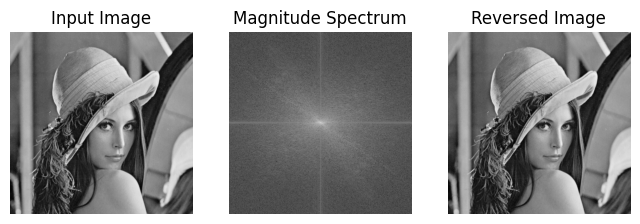

In [12]:

# 画像を読み込む
img = Image.open('imgs/lena.png')
# グレイスケールに変換する
gray_img = img.convert('L')
# NumPy 配列にする
f_xy = np.asarray(gray_img)

# 2 次元高速フーリエ変換で周波数領域の情報を取り出す
f_uv = np.fft.fft2(f_xy)
# 画像の中心に低周波数の成分がくるように並べかえる
shifted_f_uv = np.fft.fftshift(f_uv)

# パワースペクトルに変換する
magnitude_spectrum2d =  np.log(np.absolute(shifted_f_uv))
magnitude_spectrum2d *= (255.0/magnitude_spectrum2d.max())

# 元の並びに直す
unshifted_f_uv = np.fft.fftshift(shifted_f_uv)
# 2 次元逆高速フーリエ変換で空間領域の情報に戻す
i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

# 上記を画像として可視化する
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
# 枠線と目盛りを消す
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 元画像
axes[0].imshow(f_xy, cmap='gray')
axes[0].set_title('Input Image')
# 周波数領域のパワースペクトル
axes[1].imshow(magnitude_spectrum2d, cmap='gray')
axes[1].set_title('Magnitude Spectrum')
# FFT -> IFFT した画像
axes[2].imshow(i_f_xy, cmap='gray')
axes[2].set_title('Reversed Image')
# グラフを表示する
plt.show()



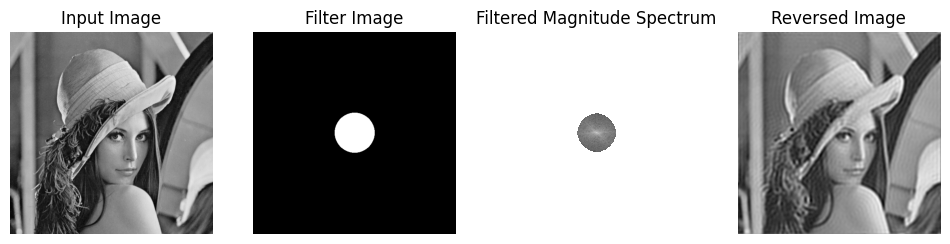

In [22]:
from PIL import ImageDraw

# フィルタ (ローパス) を用意する
x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                          size=(shifted_f_uv.shape[0],
                                shifted_f_uv.shape[1]),
                          color=0,  # default black
                          )
# 中心に円を描く
draw = ImageDraw.Draw(x_pass_filter)
# 円の半径
ellipse_r = 50
# 画像の中心
center = (shifted_f_uv.shape[0] // 2,
          shifted_f_uv.shape[1] // 2)
# 円の座標
ellipse_pos = (center[0] - ellipse_r,
               center[1] - ellipse_r,
               center[0] + ellipse_r,
               center[1] + ellipse_r)
draw.ellipse(ellipse_pos, fill=255)
# フィルタ
filter_array = np.asarray(x_pass_filter)

# フィルタを適用する
filtered_f_uv = np.multiply(shifted_f_uv, filter_array)

# パワースペクトルに変換する
np.seterr(divide = 'ignore') 
magnitude_spectrum2d = np.log(np.absolute(filtered_f_uv))
magnitude_spectrum2d *= (255.0/magnitude_spectrum2d.max())
np.seterr(divide = 'warn') 

# 元の並びに直す
unshifted_f_uv = np.fft.fftshift(filtered_f_uv)
# 2 次元逆高速フーリエ変換で空間領域の情報に戻す
i_f_xy = np.fft.ifft2(unshifted_f_uv).real  # 実数部だけ使う

# 上記を画像として可視化する
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
# 枠線と目盛りを消す
for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
# 元画像
axes[0].imshow(f_xy, cmap='gray')
axes[0].set_title('Input Image')
# フィルタ画像
axes[1].imshow(filter_array, cmap='gray')
axes[1].set_title('Filter Image')
# フィルタされた周波数領域のパワースペクトル
axes[2].imshow(magnitude_spectrum2d, cmap='gray')
axes[2].set_title('Filtered Magnitude Spectrum')
# FFT -> Band-pass Filter -> IFFT した画像
axes[3].imshow(i_f_xy, cmap='gray')
axes[3].set_title('Reversed Image')
# グラフを表示する
plt.show()
